## TEXT CLASSIFICATION

#### Model Evaluation: 

**Accuracy** - Accuracy in classification problem is the number of correct predictions made by the model divided by the total number of predictions. **Accuracy is useful when target classes are well balanced.** For example, If we are predicting SPAM messages, we would have roughly the same amount of spam messages as we have legit messages. **Accuracy is not good choice with unbalanced classes.** Imagine we have 99 legit messgaes and 1 spam message. Our model will have 99% accuracy bit that's not correct.

In this situation we'll understand Recall, Precision and f1 score.

**Recall** - Ability to find **all** the relevant cases within a dataset. **Number of true positive divided by the number of true positives plus the number of false negatives.**

**Precision** - Ability of a classification model to identify **only** the relevant data points. **True positives divided by the number of true positives plus the number of false positives**

Recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.

<img src="https://miro.medium.com/max/888/1*7J08ekAwupLBegeUI8muHA.png" />

**F1-Score** - Combination of Recall and Precision (Optimal blend of precision and Recall). F1 score is **the harmonic mean of precision and recall taking both metrics into account in the following equation:**

<img src="https://www.mikulskibartosz.name/assets/images/2019-02-04-f1-score-explained/formula.png" width="500" />

We use the harmonic mean instead of a simple avergae because it punishes extreme values. Example- A classiferwith a precision of 1.0 and a recall of 0.0 has a simple average of 0.5 but and F1 score of 0.

Precision and Recall typically make more sense in the context of a confusion matrix.

So, You sould have 4 separate groups at the end of testing:

1. Correctly classified as True Legit Message
2. Correctly classified as True Spam Message
3. Incorrectly classified False Legit Message
4. Incorrectly classifed Flase Spam Message

<img src="https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png" />
<img src="1.PNG" width ="600" />

Flase Negative(FN) - Type II error
False Positives (FP) - Type I error

<img src="2.PNG" width="600" />
<img src="3.PNG" />

**Which matrix is good to calculate in classification?** It all rally depends on the specific situation.

#### Example: Imagine testing for disease.

| n=165         | Predicted NO  | Predicted YES  |
| ------------- |:-------------:|          -----:|
| ACTUAL NO     | 50            |             10 |
| ACTUAL YES    | 5             |            100 |

*Example: Test for presence of disease*
*NO = negative test = False = 0*
*Yes = positive test = True = 1*

| n=165          | **Predicted NO**| **Predicted YES**  | **Total** |
| -------------  |:---------------:|              -----:|    -----: |
| **ACTUAL NO**  | TN = 50         |            FP = 10 | **60**    |
| **ACTUAL YES** | FN = 5          |           TP = 100 | **105**   |
| **Total**      |           **55**|             **110**|

**Basic Terminology**
1. True Positives (TP)
2. True Negatives (TN)
3. False Positives (FP)
4. False Negatives (FN)

**Accuracy** - Overall, how often is it correct?
(TP+TN)/Total = 150/165 = 0.91

**Misclassification Rate(Error Rate)** Overall, how often is it wrong?
(FP+FN)/Total = 15/165 = 0.09

<img src="4.PNG" width="400" />

[Checkout the wikipedia page - Very helpful](https://en.wikipedia.org/wiki/Confusion_matrix)

[Checkout GeeksforGeeks Page](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/)

In [30]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [6]:
#it will treat false as zero and true as one, so if there is any missing data, we'll be able to see
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

No Missing Data in our dataset

In [7]:
#checking te number of rows
len(df)

5572

In [8]:
df['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [9]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<font color=green>We see that 4825 out of 5572 messages, or 86.6%, are ham.<br>This means that any machine learning model we create has to perform **better than 86.6%** to beat random chance.</font>

We'll try to build one simple machine learning model which will use length of message and Punctuation in message to predict Ham(legit) or spam messages. 

#### First we'll visualize this data

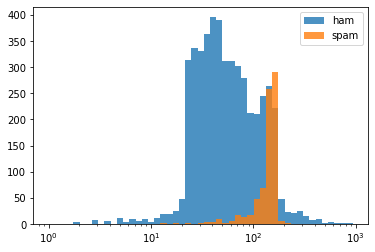

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<font color=green> It looks like there's a small range of values where a message is more likely to be a spam tham ham. So, Length of messgae is very important feature for machine learning model </font>

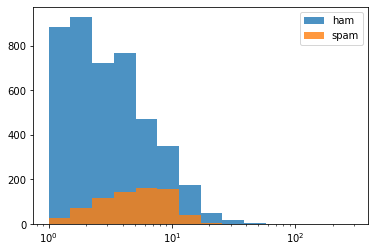

In [13]:
plt.xscale('log')
bins=1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'], bins=bins, alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<font color = red> This looks worse, there seem to be no values where one would pick spam over ham. We'll still try to build a machine learning classification model, but we should expect poor results. </font>

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
# X feature data
#two [[]] because we're passing a list of columns
X= df[['length','punct']]

# y is our label
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [22]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3900, 2)
Shape of X_test: (1672, 2)
Shape of y_train: (3900,)
Shape of y_test: (1672,)


### Training a Model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr_model = LogisticRegression(solver='lbfgs')

In [25]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<font color = blue> **Our Model is now ready to predict** </font>

### Testing the Accuracy of the Model

In [26]:
from sklearn import metrics

#create a prediction 
predictions = lr_model.predict(X_test)

In [27]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [28]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [29]:
#let's compare our results with y_test
#one way of doing that is to create a confusion matrix

print(metrics.confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


To interpret the above outout see the below image
<img src="2.PNG" width="600" />

In [31]:
#we can make confusion matrix less confusing by adding labels:
df1 = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df1

,ham,spam
ham,1404,44
spam,219,5


<font color=red> These results are terrible! More spam messages were confused as ham (219) than correctly identified as spam(5), although a small number of ham messages (44) were confused as spam. </font>

In [32]:
#print a classififcation report
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [33]:
#print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8427033492822966


<font color = red> This model performed *worse* than a classifier that assigned all messages as "ham" would have! </font>

## Train a naive Bayes classifier:

One of the most common and successful - classifer is naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### Run predictions and report on metrics

In [37]:
predictions_NB = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions_NB))

[[1438   10]
 [ 224    0]]


<font color = green> The total number of consusions dropped from 263(219+44) to 234(224+10) </font>

In [38]:
print(metrics.classification_report(y_test,predictions_NB))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [39]:
print(metrics.accuracy_score(y_test,predictions_NB))

0.8600478468899522


<font color = Blue> Better, but still less accuarte than 86.6% </font>

## Train a support vector machine (SVM) classifier

Among the SVM options available, we'll use C-Support Vector Classification (SVC)

In [40]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Run predictions and report on metrics

In [41]:
predictions_svc = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions_svc))

[[1373   75]
 [ 121  103]]


<font color = green> The total number of confusions dropped even further to 196(121+75). </font>

In [42]:
print(metrics.classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [43]:
print(metrics.accuracy_score(y_test, predictions_svc))

0.8827751196172249


<font color = green> And finally we have a model which performs ***slightly*** better than a random chance. </font>

Now, I am able to load a dataset, divide in into training and testing set, and perform simple analyses using scikit learn.